# **Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score
import itertools

# **Understanding Data**

In [ ]:
df = pd.read_csv("/content/heart-disease.csv")

In [ ]:
df.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


In [ ]:
df.describe()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           920 non-null    float64
 1   Gender                        920 non-null    float64
 2   Chest pain type               920 non-null    float64
 3   Resting blood pressure        861 non-null    float64
 4   Serum cholesterol             890 non-null    float64
 5   Fasting blood sugar           830 non-null    float64
 6   Resting electrocardiographic  918 non-null    float64
 7   Maximum heart rate            865 non-null    float64
 8   Exercise induced angina       865 non-null    float64
 9   ST depression                 858 non-null    float64
 10  ST segment                    611 non-null    float64
 11  Number of major vessels       309 non-null    float64
 12  Thal                          434 non-null    float64
 13  class

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
Gender,920.0,0.789130,0.408148,0.0,1.0,1.0,1.0,1.0
Chest pain type,920.0,3.250000,0.930969,1.0,3.0,4.0,4.0,4.0
Resting blood pressure,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
Serum cholesterol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
Fasting blood sugar,830.0,0.166265,0.372543,0.0,0.0,0.0,0.0,1.0
Resting electrocardiographic,918.0,0.604575,0.805827,0.0,0.0,0.0,1.0,2.0
Maximum heart rate,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
Exercise induced angina,865.0,0.389595,0.487941,0.0,0.0,0.0,1.0,1.0
ST depression,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2


# **Exploratory Data Analysis**

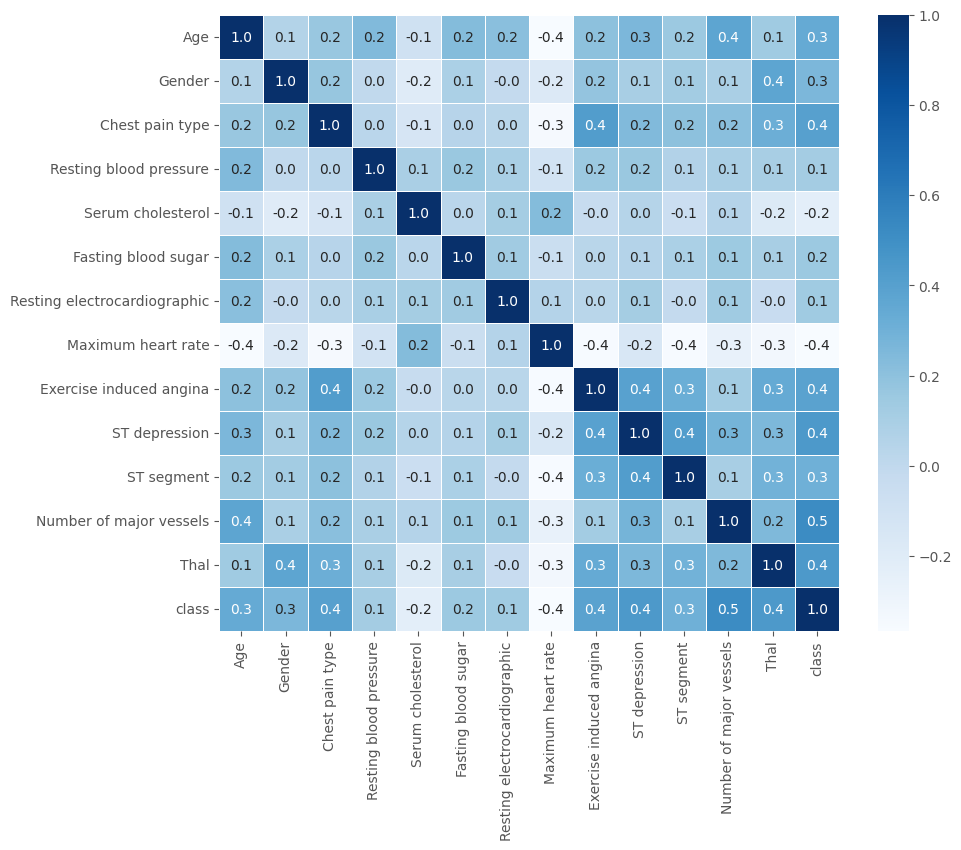

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8)) # Decreased the size of the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=0.7, cmap="Blues")

plt.show()


In [ ]:
fig = px.box(df,y="age",x="output",title=f"Distrubution of Age")
fig.show()

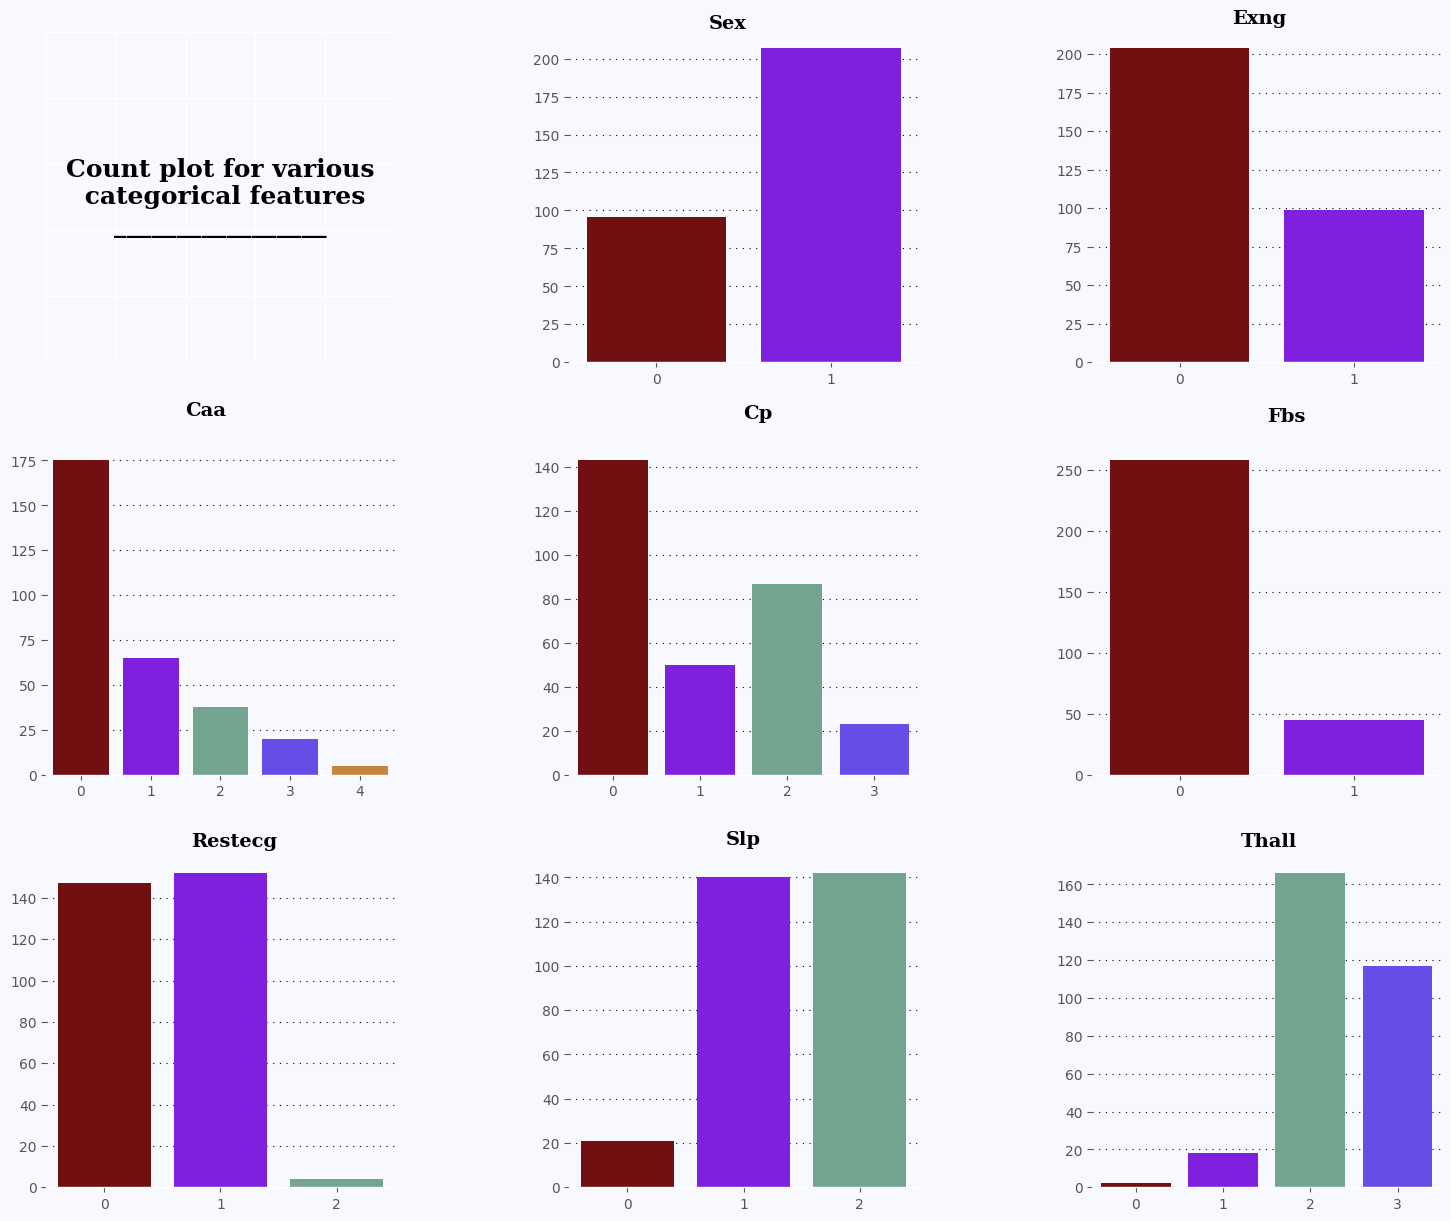

In [ ]:
#Graphing format idea taken from kaggle ( Anon., 2023. Heart Attack Analysis & Prediction Dataset [online]. www.kaggle.com. Available from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/code?datasetId=1226038&sortBy=voteCount)

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#F8F8FF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")


# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

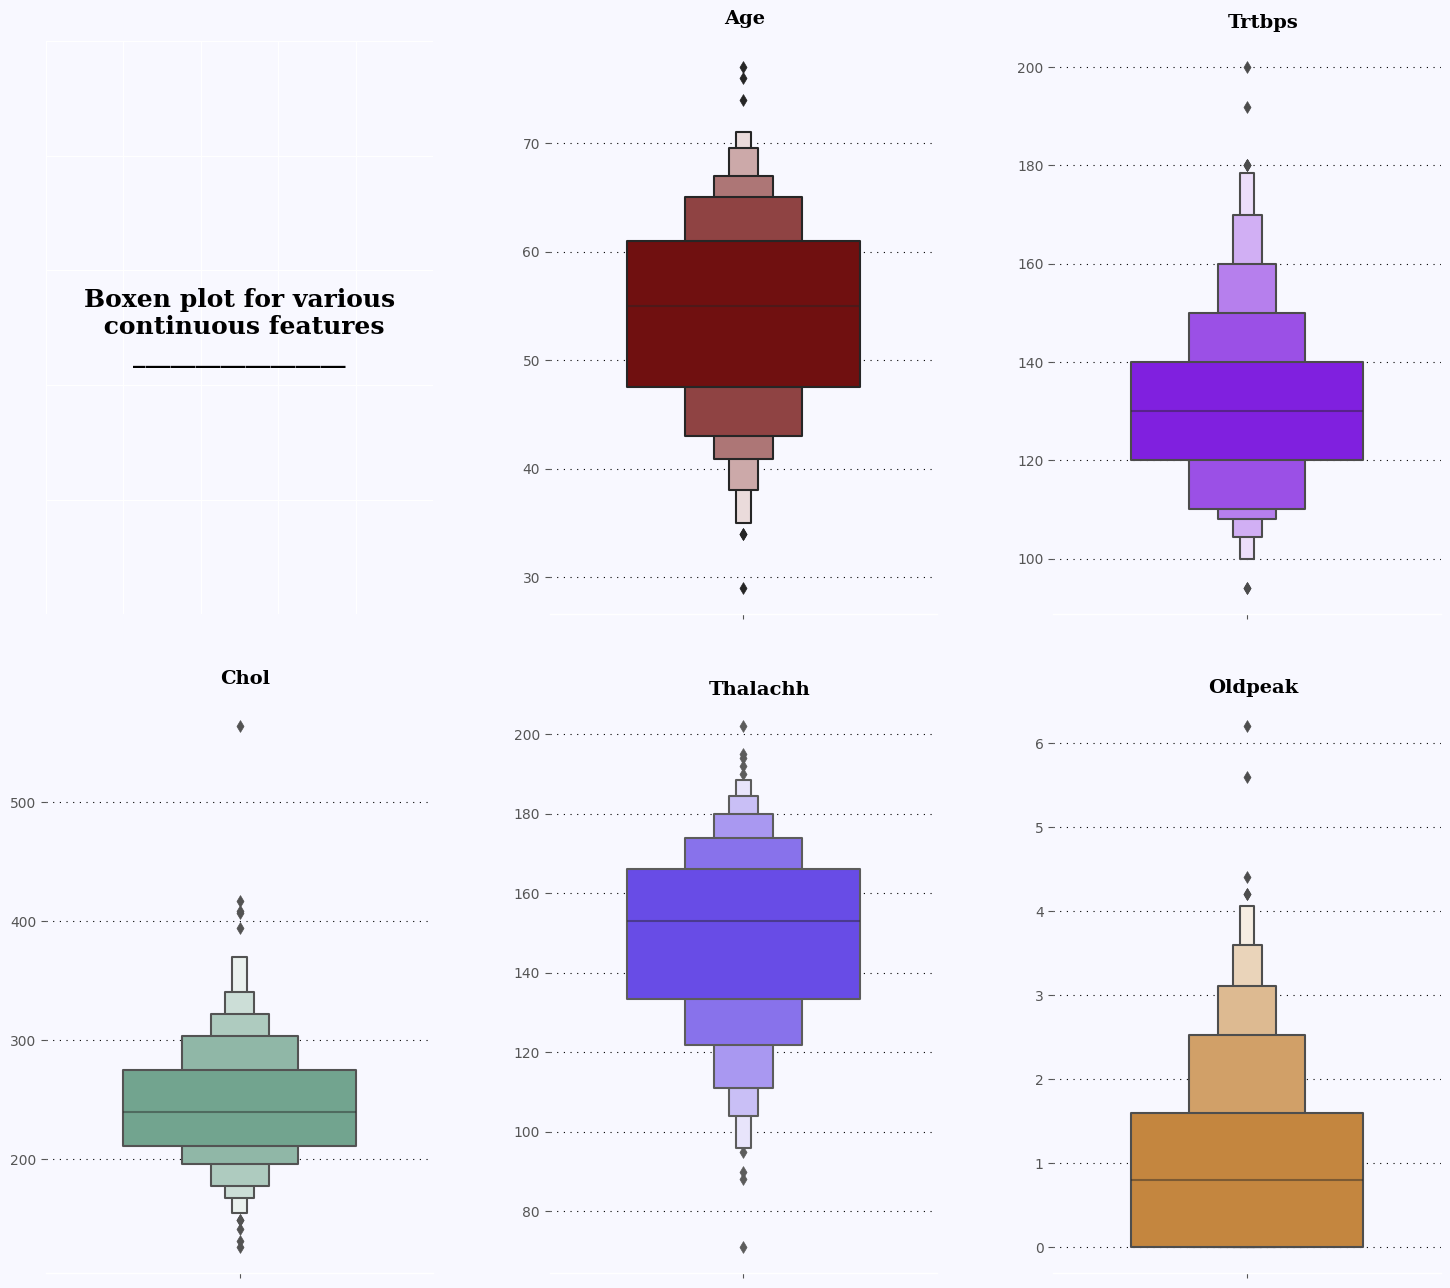

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#F8F8FF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

# **Data Pre Processing**

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from prettytable import PrettyTable

In [ ]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


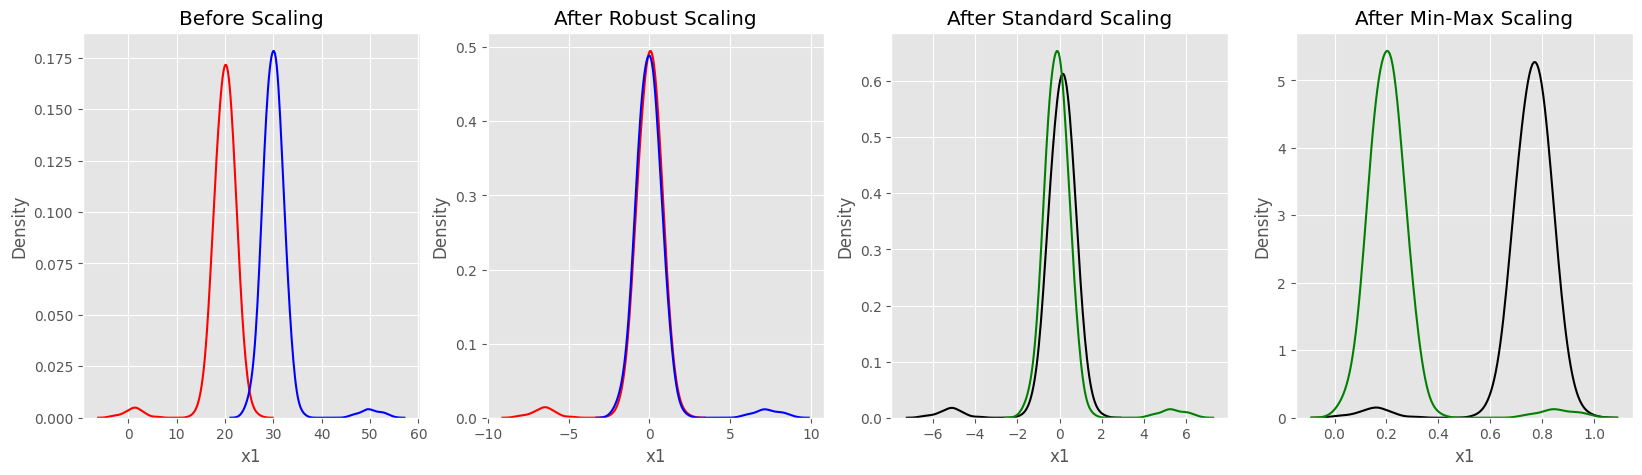

In [ ]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()


**Train/Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# ***Modeling***

#**Linear Classifiers**

**Support Vector Machine**

In [ ]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy Score:  0.8688524590163934


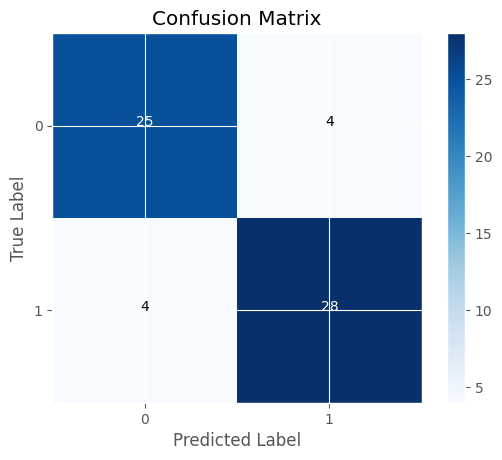

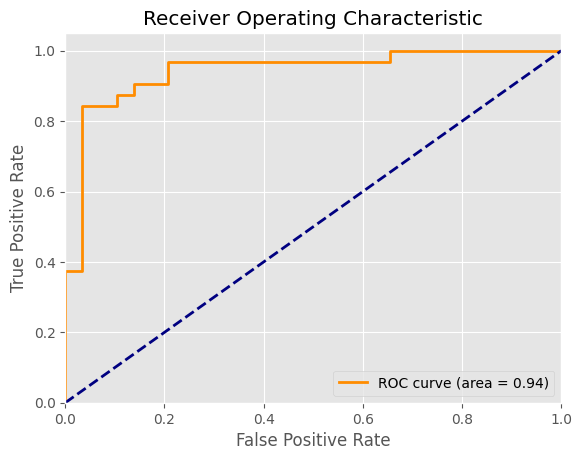

In [ ]:
# print classification report and accuracy score
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

# plot ROC curve
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()


**Hyperparameter tuning of SVC**

In [ ]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



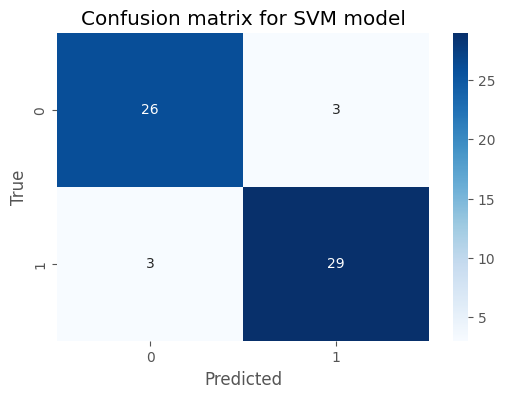

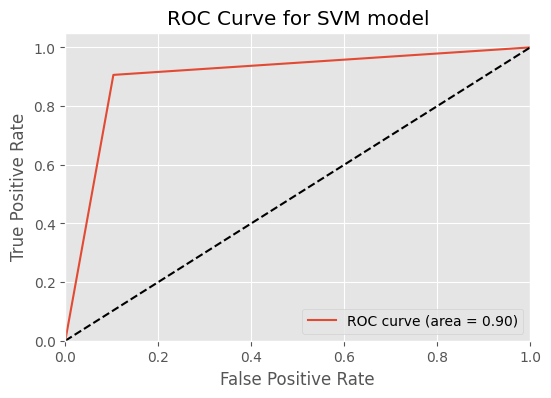

In [ ]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix for SVM model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM model')
plt.legend(loc="lower right")
plt.show()


**Logistic Regression**

In [ ]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



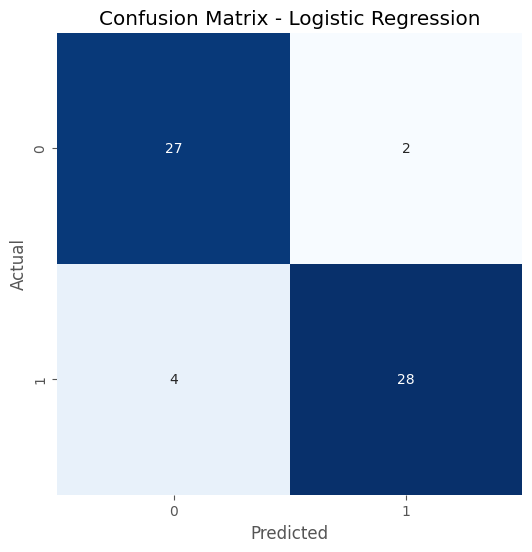

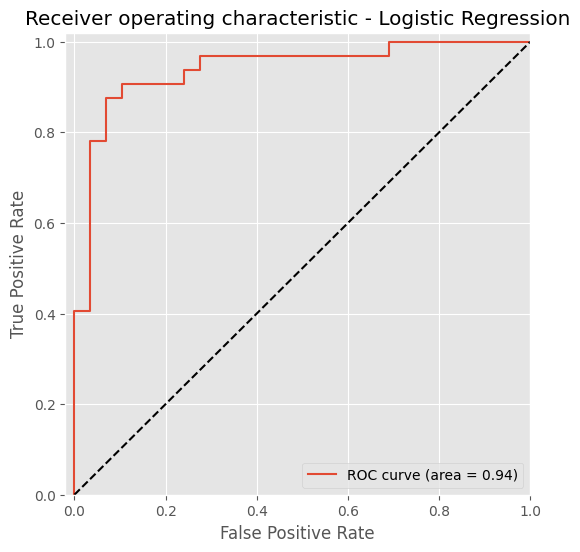

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**ADA BOOST**

In [ ]:
# instantiate the model
ada = AdaBoostClassifier()

# fit the model
ada.fit(X_train, y_train)

# make predictions
y_pred = ada.predict(X_test)

# print test accuracy
print("The test accuracy score of AdaBoost Classifier is ", accuracy_score(y_test, y_pred))


The test accuracy score of AdaBoost Classifier is  0.7540983606557377


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



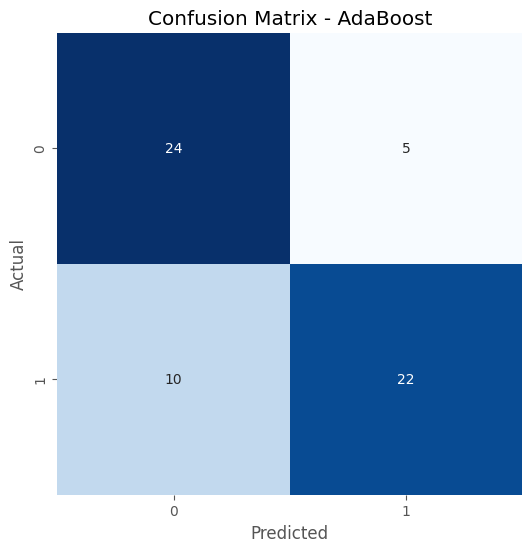

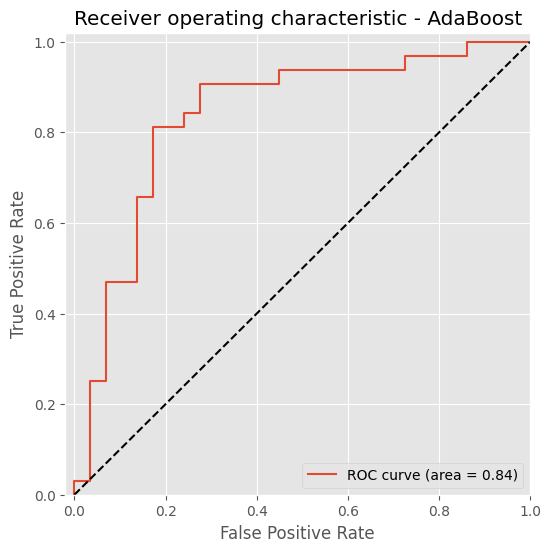

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')

# plotting ROC curve
y_pred_proba = ada.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()

# **Tree Models**

**Decision Trees**

In [ ]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



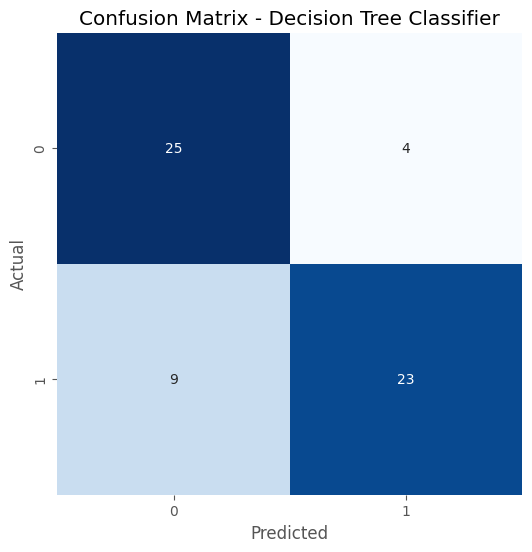

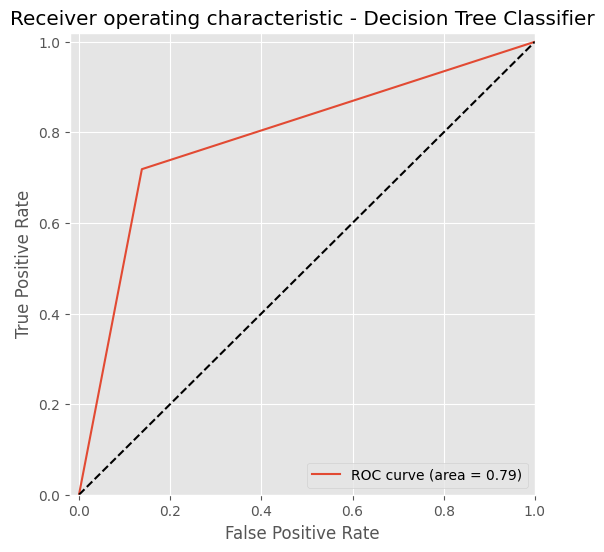

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')

# calculating the predicted probabilities
y_pred_proba = dt.predict_proba(X_test)

# plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



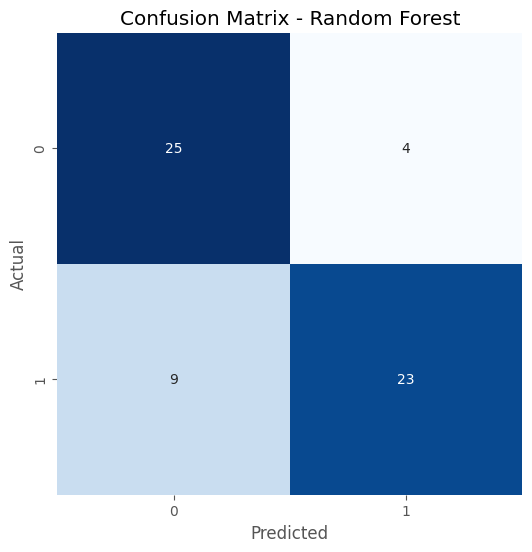

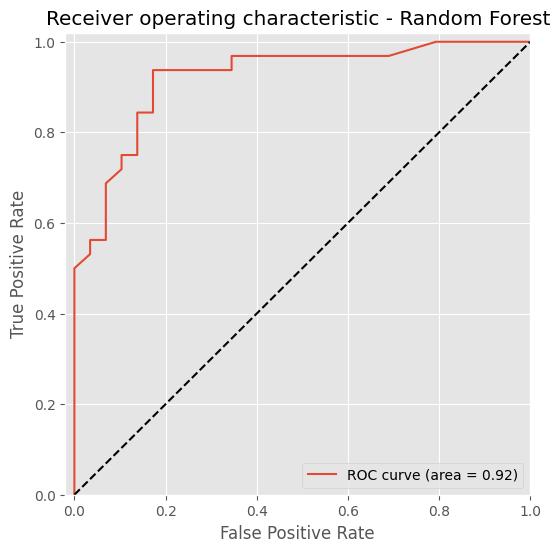

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# plotting ROC curve
y_pred_proba = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

**Random Forest - After tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  [1,2,3,4,5,6,7,8,9,10]
min_samples_leaf_value = [1,2,3,4,5,6,7,8,9,10]
criterion_value = ["gini", "entropy"]
n_estimators = [10,50,100,200]


param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value,
                  n_estimators = n_estimators)
#making the instance
model=RandomForestClassifier(random_state=123)
#learning
rfc_clf = GridSearchCV(estimator=model,cv=5,param_grid=param_grid,n_jobs=-1)
rfc_clf.fit(X_train, y_train)

print(rfc_clf.best_params_)
model = RandomForestClassifier(n_estimators=int(rfc_clf.best_params_['n_estimators']),
                               min_samples_leaf=int(rfc_clf.best_params_['min_samples_leaf']),
                               criterion=rfc_clf.best_params_['criterion'],
                               max_depth=rfc_clf.best_params_['max_depth'],
                               max_features=rfc_clf.best_params_['max_features'])
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 4, 'n_estimators': 50}
Accuracy: 0.819672131147541
Confusion Metrix:
 [[26  8]
 [ 3 24]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



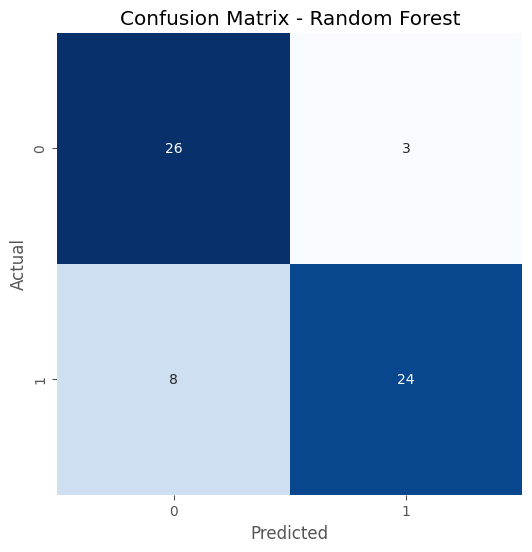

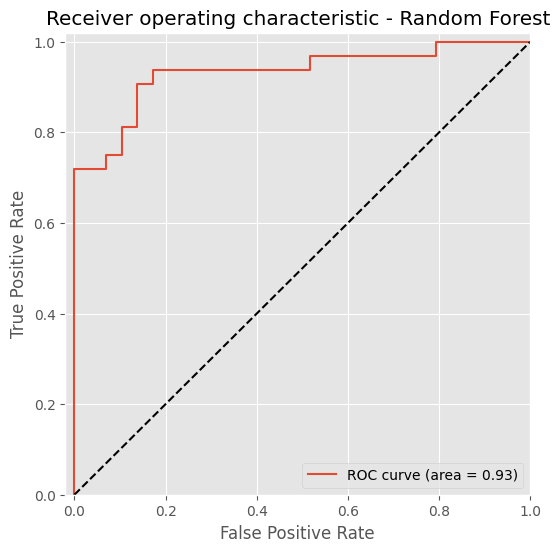

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# plotting ROC curve
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

**Gradient Boosting Classifier**

In [ ]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



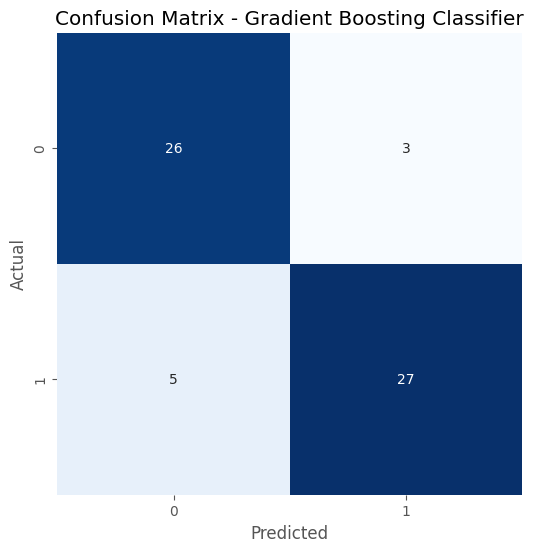

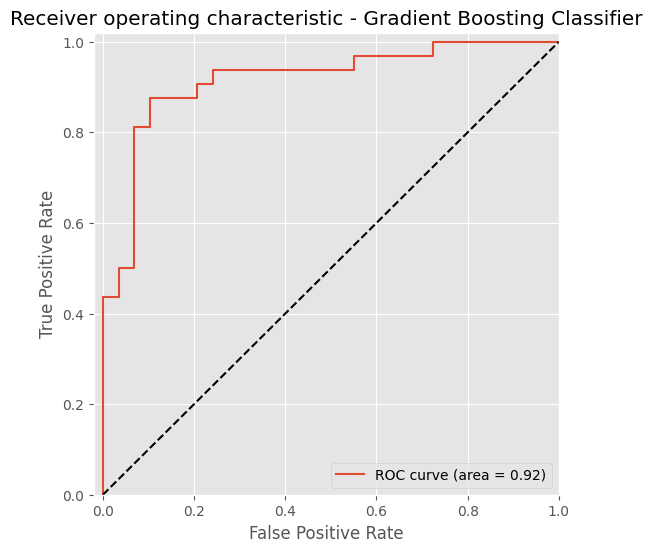

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

# plotting ROC curve
y_pred_proba = gbt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

**Gradient Boosting Classifier - After Tuning**

In [ ]:
parametros_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

In [ ]:
FOLDS =10

In [ ]:
model_gb= GradientBoostingClassifier()

gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parametros_gb, n_iter = 100, cv = FOLDS,
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')

gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mae'],
                                        'learning_rate': [0.01, 0.025, 0.005,
                                                          0.5, 0.075, 0.1, 0.15,
                                                          0.2, 0.3, 0.8, 0.9],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8, 10, 15, 20, 25,
                                                      30, 40, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10,
                                                             15, 20, 40, 50, 55,
                                                             60, 65, 70, 80, 85,
                                                             90, 100],
                                        'min_samples_split': [0.01, 0.025,
                                                              0.005, 0.4, 0.5,
                                                              0.075, 0.1, 0.15,
                                                              0.2, 0.3, 0.8,
                                                              0.9],
                                        'n_estimators': range(1, 100),
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                                                      0.9, 0.95, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
print(gb_random.best_params_)

{'subsample': 0.8, 'n_estimators': 24, 'min_samples_split': 0.3, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.3, 'criterion': 'friedman_mse'}


In [ ]:
model_gb = GradientBoostingClassifier(subsample=gb_random.best_params_['subsample'],
                                      n_estimators=gb_random.best_params_['n_estimators'],
                                      min_samples_split=gb_random.best_params_['min_samples_split'],
                                      min_samples_leaf=gb_random.best_params_['min_samples_leaf'],
                                      max_features=gb_random.best_params_['max_features'],
                                      max_depth=gb_random.best_params_['max_depth'],
                                      loss=gb_random.best_params_['loss'],
                                      learning_rate=gb_random.best_params_['learning_rate'],
                                      criterion=gb_random.best_params_['criterion'])
test_score = cross_val_score(model_gb, X_train, y_train, cv=FOLDS, scoring='accuracy').mean()
test_score

0.8096666666666668

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



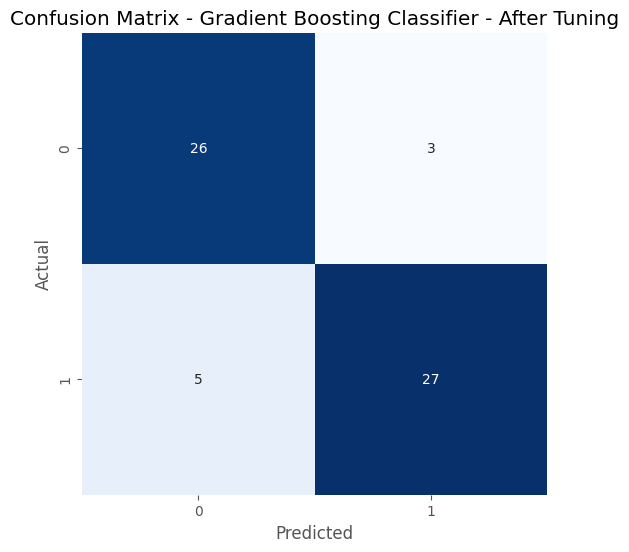

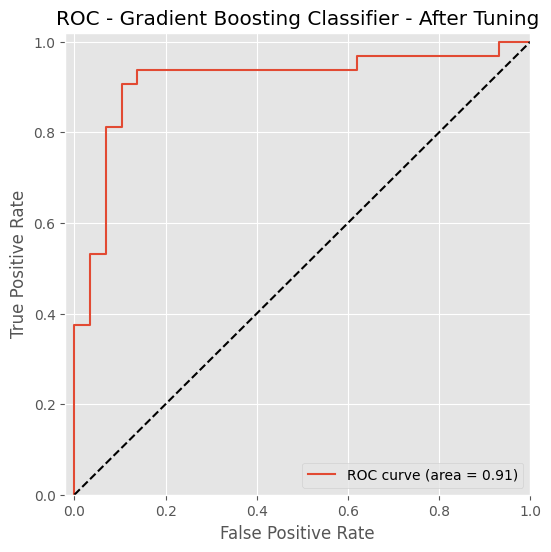

In [ ]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier - After Tuning')

# plotting ROC curve
y_pred_proba = gb_random.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Gradient Boosting Classifier - After Tuning')
plt.legend(loc="lower right")
plt.show()

### KNN

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

knn_clf = GridSearchCV(estimator=model_KNN,cv=5,param_grid=param_grid,n_jobs=-1)
knn_clf.fit(X_train, y_train)
print(knn_clf.best_params_)

{'n_neighbors': 6}


In [ ]:
model = KNeighborsClassifier(n_neighbors=knn_clf.best_params_['n_neighbors'])
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))


Accuracy: 0.8524590163934426


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



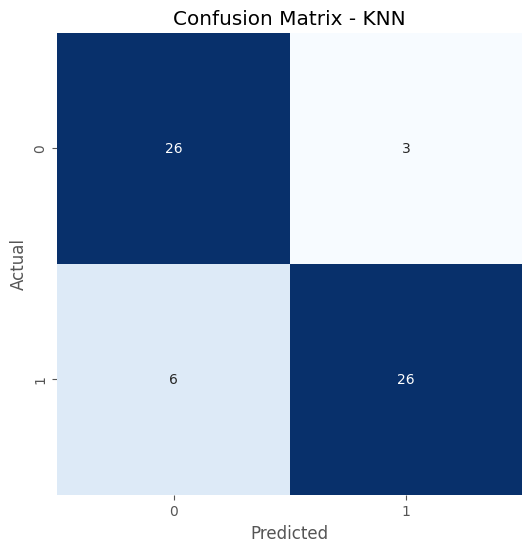

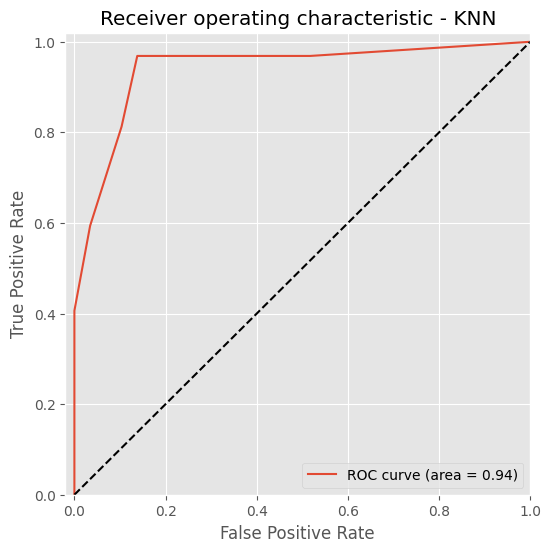

In [ ]:
# calculating the predictions
y_pred = model.predict(X_test)

# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')

# plotting ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - KNN')
plt.legend(loc="lower right")
plt.show()


Conclusion in Tabular Format

In [ ]:
x = PrettyTable()
x.field_names = ["Row Number","Model Name","Hyperparameters", "Accuracy"]
x.add_row([1,"SVM","{'C': 3, 'gamma': 0.1}","90.1 %"])
x.add_row([2,"Logistic Regression","-","90.16 %"])
x.add_row([3,"Decision Tree","-","78.68 %"])
x.add_row([4,"Random Forest","{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, \n 'min_samples_leaf': 4, 'n_estimators': 50}","83.6 %"])
x.add_row([5,"Gradient Boosting","{'subsample': 0.8, 'n_estimators': 71, 'min_samples_split': 0.075,\n 'min_samples_leaf': 3, 'max_features': 'log2', \n'max_depth': 30, 'loss': 'deviance',\n 'learning_rate': 0.075, 'criterion': 'friedman_mse'}","82.61 %"])
x.add_row([6,"KNN","{'n_neighbors': 6}","85.24 %"])

In [ ]:
print(x)

+------------+---------------------+--------------------------------------------------------------------+----------+
| Row Number |      Model Name     |                          Hyperparameters                           | Accuracy |
+------------+---------------------+--------------------------------------------------------------------+----------+
|     1      |         SVM         |                       {'C': 3, 'gamma': 0.1}                       |  90.1 %  |
|     2      | Logistic Regression |                                 -                                  | 90.16 %  |
|     3      |    Decision Tree    |                                 -                                  | 78.68 %  |
|     4      |    Random Forest    |  {'criterion': 'entropy', 'max_depth': None, 'max_features': 5,    |  83.6 %  |
|            |                     |             'min_samples_leaf': 4, 'n_estimators': 50}             |          |
|     5      |  Gradient Boosting  | {'subsample': 0.8, 'n_estim

### Creating Ensembles/ Stacking of all models

In [ ]:
def ensemble_models(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test,y_pred)
    return acc

**Arithmetic Mean**

In [ ]:
# final_y = []
y1 = ensemble_models(LogisticRegression())
y2 = ensemble_models(KNeighborsClassifier(n_neighbors=6))
y3 = ensemble_models(SVC(C=3,gamma=0.1))
y4 = ensemble_models(DecisionTreeClassifier())
y5 = ensemble_models(GradientBoostingClassifier(subsample=gb_random.best_params_['subsample'],
                                      n_estimators=gb_random.best_params_['n_estimators'],
                                      min_samples_split=gb_random.best_params_['min_samples_split'],
                                      min_samples_leaf=gb_random.best_params_['min_samples_leaf'],
                                      max_features=gb_random.best_params_['max_features'],
                                      max_depth=gb_random.best_params_['max_depth'],
                                      loss=gb_random.best_params_['loss'],
                                      learning_rate=gb_random.best_params_['learning_rate'],
                                      criterion=gb_random.best_params_['criterion']))

final_y = np.array([y1,y2,y3,y4,y5])

print(f"The overall accuracy after emsembling/stacking the models is {np.round(final_y.mean(),2)*100} %")

The overall accuracy after emsembling/stacking the models is 85.0 %


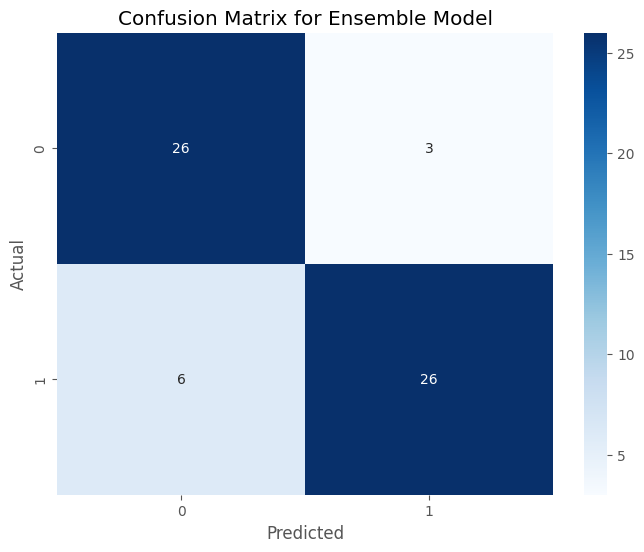

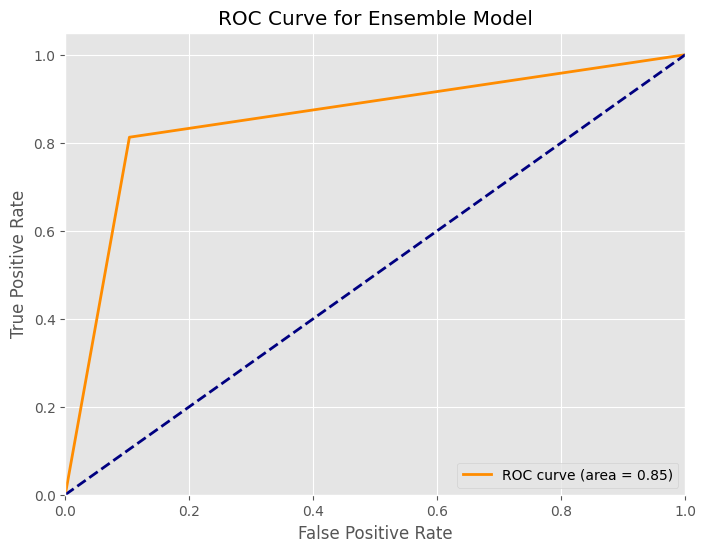

In [ ]:
# Confusion Matrix
y_pred_ensemble = (final_y > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')

# ROC Curve
y_score_ensemble = final_y.mean()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Model')
plt.legend(loc="lower right")
plt.show()


** Geometric Mean**

In [ ]:
# final_y = []
y1 = ensemble_models(LogisticRegression())
y2 = ensemble_models(KNeighborsClassifier(n_neighbors=6))
y3 = ensemble_models(SVC(C=3,gamma=0.1))
y4 = ensemble_models(DecisionTreeClassifier())
y5 = ensemble_models(GradientBoostingClassifier(subsample=gb_random.best_params_['subsample'],
                                      n_estimators=gb_random.best_params_['n_estimators'],
                                      min_samples_split=gb_random.best_params_['min_samples_split'],
                                      min_samples_leaf=gb_random.best_params_['min_samples_leaf'],
                                      max_features=gb_random.best_params_['max_features'],
                                      max_depth=gb_random.best_params_['max_depth'],
                                      loss=gb_random.best_params_['loss'],
                                      learning_rate=gb_random.best_params_['learning_rate'],
                                      criterion=gb_random.best_params_['criterion']))

final_y = np.array([y1,y2,y3,y4,y5])

print(f"The overall accuracy after emsembling/stacking the models is {(np.prod(final_y))**(1/len(final_y))*100} %")

The overall accuracy after emsembling/stacking the models is 85.71290761741234 %


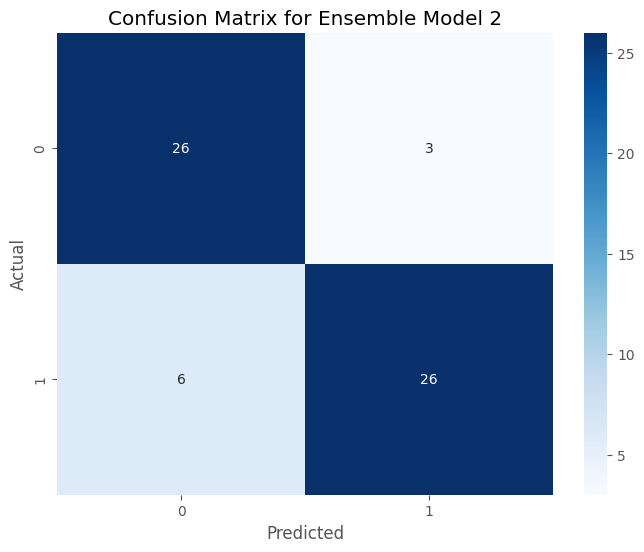

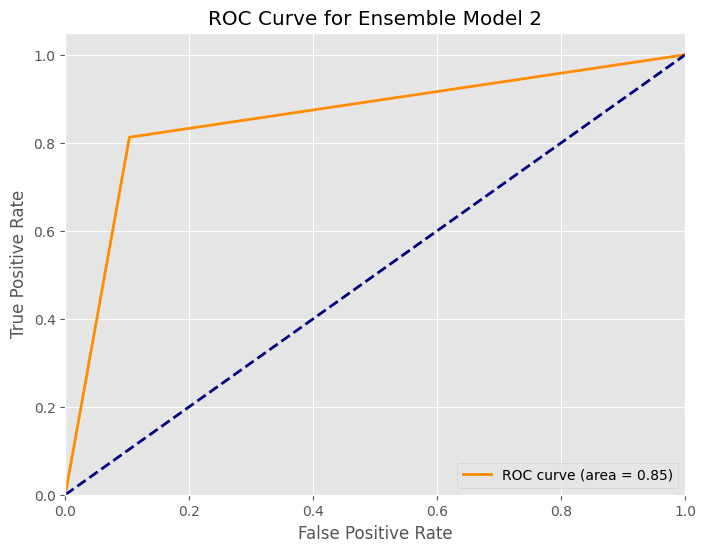

In [ ]:
# Confusion Matrix
y_pred_ensemble = (final_y > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model 2')

# ROC Curve
y_score_ensemble = final_y.mean()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Model 2')
plt.legend(loc="lower right")
plt.show()
